<a href="https://colab.research.google.com/github/programmingBae/bangkit-capstone-project/blob/main/Model/TypingSuggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re

data = open("./sample_data/data.md").read()


new_data = re.sub(r'[#]+', '', data)


corpus = new_data.lower().split("\n")
print(len(corpus))
unused = [" ", "", "----------"]

corpus = [x for x in corpus if x not in unused]
print(len(corpus))

# # Preview the result
# textfile = open("./sample_data/a_file.txt", "w")
# for element in corpus:
#     textfile.write(element + "\n")
# textfile.close()

734
251


In [ ]:
import tensorflow as tf
import numpy as np 

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')
print(tf.__version__)

{'yang': 1, 'pada': 2, 'untuk': 3, 'tidak': 4, 'bisa': 5, 'kamu': 6, 'https': 7, 'sebaiknya': 8, 'menggunakan': 9, 'dengan': 10, 'com': 11, 'di': 12, 'br': 13, 'android': 14, 'www': 15, 'dicoding': 16, 'academies': 17, 'ini': 18, 'dan': 19, 'fungsi': 20, 'tutorials': 21, 'ketika': 22, 'kembali': 23, 'dalam': 24, 'dari': 25, 'jika': 26, 'seperti': 27, 'halaman': 28, 'digunakan': 29, 'sebuah': 30, 'anda': 31, 'test': 32, 'aplikasi': 33, '129': 34, 'ada': 35, 'dapat': 36, 'atau': 37, 'layout': 38, 'viewmodel': 39, 'submission': 40, 'agar': 41, 'hindari': 42, 'karena': 43, 'akan': 44, 'kode': 45, 'terdapat': 46, 'berikut': 47, 'pengujian': 48, 'project': 49, 'nilai': 50, 'val': 51, 'sudah': 52, 'kotlin': 53, 'data': 54, 'hanya': 55, 'livedata': 56, 'kelas': 57, 'lebih': 58, 'melakukan': 59, 'variable': 60, 'seharusnya': 61, 'reference': 62, 'view': 63, 'silakan': 64, 'gunakan': 65, 'sesuai': 66, 'class': 67, 'perlu': 68, 'case': 69, 'code': 70, 'ke': 71, 'sebagai': 72, 'belum': 73, 'login'

In [ ]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

	# Tokenize the current line
	token_list = tokenizer.texts_to_sequences([line])[0]

	# Loop over the line several times to generate the subphrases
	for i in range(1, len(token_list)):
		
		# Generate the subphrase
		n_gram_sequence = token_list[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)

# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

78


In [ ]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['android', 'boilerplate', 'comment']
[14, 530, 245]


In [ ]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  76   1   6 180]
decoded to text: ['file yang kamu kirimkan']
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 332


In [ ]:
# Pick element
elem_number = 4

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 76  1  6]
decoded to text: ['file yang kamu']
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 180


In [ ]:
# Hyperparameters
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

# Build the model
model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 77, 100)           109900    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1099)              330799    
                                                                 
Total params: 741,899
Trainable params: 741,899
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 100

# Train the model
history = model.fit(xs, ys, epochs=epochs)

Epoch 1/100
123/123 [==============================] - 28s 199ms/step - loss: 6.2869 - accuracy: 0.0545
Epoch 2/100
123/123 [==============================] - 24s 198ms/step - loss: 5.0455 - accuracy: 0.1578
Epoch 3/100
123/123 [==============================] - 24s 198ms/step - loss: 3.7874 - accuracy: 0.2807
Epoch 4/100
123/123 [==============================] - 24s 198ms/step - loss: 2.5588 - accuracy: 0.4230
Epoch 5/100
123/123 [==============================] - 24s 199ms/step - loss: 1.6140 - accuracy: 0.6101
Epoch 6/100
123/123 [==============================] - 25s 200ms/step - loss: 0.9902 - accuracy: 0.7567
Epoch 7/100
123/123 [==============================] - 24s 198ms/step - loss: 0.6409 - accuracy: 0.8470
Epoch 8/100
123/123 [==============================] - 24s 199ms/step - loss: 0.4062 - accuracy: 0.9068
Epoch 9/100
123/123 [==============================] - 24s 199ms/step - loss: 0.2922 - accuracy: 0.9282
Epoch 10/100
123/123 [==============================] - 24s 197m

In [ ]:
model.save('saved_model/my_model') 

AttributeError: ignored

In [ ]:
!zip -r /content/saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 64%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 89%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 91%)


In [ ]:
from google.colab import files
files.download('/content/saved_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Define seed text
seed_text = "Jika return type pada sebuah fungsi tidak kamu manfaatkan,"

# Define total words to predict
next_words = 6

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(token_list)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:
		
		# Look up the word associated with the index. 
		output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result	
print(seed_text)

ValueError: ignored

In [ ]:
# Define seed text
seed_text = "variable"

# Define total words to predict
next_words = 5

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])
	
  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:
		
		# Look up the word associated with the index. 
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word

# Print the result	
print(seed_text)

variable konstan yang hanya berisi dan


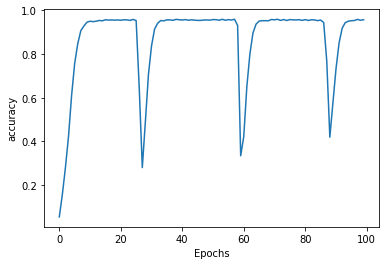

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

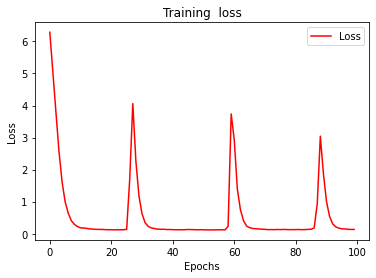

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss = history.history['loss']


epochs = [*range(100)]

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training  loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.show()

In [ ]:
!unzip "/content/sample_data/saved_model.zip" -d "/content/sample_data/saved_model"

Archive:  /content/sample_data/saved_model.zip
   creating: /content/sample_data/saved_model/content/saved_model/
   creating: /content/sample_data/saved_model/content/saved_model/my_model/
   creating: /content/sample_data/saved_model/content/saved_model/my_model/assets/
   creating: /content/sample_data/saved_model/content/saved_model/my_model/variables/
  inflating: /content/sample_data/saved_model/content/saved_model/my_model/variables/variables.index  
  inflating: /content/sample_data/saved_model/content/saved_model/my_model/variables/variables.data-00000-of-00001  
  inflating: /content/sample_data/saved_model/content/saved_model/my_model/keras_metadata.pb  
  inflating: /content/sample_data/saved_model/content/saved_model/my_model/saved_model.pb  


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/sample_data/saved_model/content/saved_model/my_model')

In [ ]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    metrics=['accuracy']
    )

In [ ]:
# Define seed text
seed_text = "File yang kamu kirimkan bukan merupakan file"

# Define total words to predict
next_words = 7

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

	
	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])
	
  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:
		
		# Look up the word associated with the index. 
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word

# Print the result	
print(seed_text)

File yang kamu kirimkan bukan merupakan file project android studio kamu melakukan pengujian test


In [ ]:
# Define seed text
seed_text = "variable"

# Define total words to predict
next_words = 6

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(token_list)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:
		
		# Look up the word associated with the index. 
		output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result	
print(seed_text)

variable yang berada didalam sebuah companion object


In [ ]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  14426      0 --:--:-- --:--:-- --:--:-- 14426
OK
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-le

In [ ]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 47 not upgraded.
Need to get 340 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.8.0 [340 MB]
Fetched 340 MB in 5s (69.2 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.8.0_all.deb ...
Unpacking tensorflow-model-server (2.8.0) ...
Setting up tensorflow-model-server (2.8.0) ...


In [ ]:
import os
import json
import tempfile
import requests
import numpy as np

import tensorflow as tf

print("\u2022 Using TensorFlow Version:", tf.__version__)

• Using TensorFlow Version: 2.8.0


In [ ]:
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



export_path = /tmp/1
total 2168
drwxr-xr-x 2 root root    4096 May 20 03:25 assets
-rw-r--r-- 1 root root   14709 May 20 03:25 keras_metadata.pb
-rw-r--r-- 1 root root 2193447 May 20 03:25 saved_model.pb
drwxr-xr-x 2 root root    4096 May 20 03:25 variables


In [ ]:
!saved_model_cli show --dir {export_path} --all



MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['embedding_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 77)
        name: serving_default_embedding_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 1099)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Concrete Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          embeddin

In [ ]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=helloworld \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 2 in a separate thread.


In [ ]:
!tail server.log

[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 245] NET_LOG: Entering the event loop ...


In [ ]:

seed_text = "kamu bisa"
next_words = 6
for _ in range(next_words):

  # Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

  # Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  print(token_list)
  data = json.dumps({"signature_name": "serving_default", "instances": token_list.tolist()})

  # Feed to the model and get the probabilities for each index
  headers = {"content-type": "application/json"}
  probabilities = requests.post('[REDACTED]', data=data, headers=headers)
  predictions = json.loads(probabilities.text)['predictions']
 

  # Get the index with the highest probability
  predicted = np.argmax(predictions, axis=-1)[0]

  # Ignore if index is 0 because that is just the padding.
  if predicted != 0:
    
    # Look up the word associated with the index. 
    output_word = tokenizer.index_word[predicted]

    # Combine with the seed text
    seed_text += " " + output_word
print(seed_text)






[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 6 5]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  6  5 77]]
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  6  5 77 53]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    6   5  77  53 226]]
[[  0   0   0   0   0   0   0   0   

In [ ]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/helloworld:predict', data=data, headers=headers)

print(json_response.text)

{
    "error": "JSON Value: {\n    \"signature_name\": \"serving_default\",\n    \"instances\": \"variable\"\n} Expecting 'instances' to be an list/array"
}


In [ ]:
# Define seed text
seed_text = "variable"

# Define total words to predict
next_words = 6

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(token_list)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:
		
		# Look up the word associated with the index. 
		output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result	
print(seed_text)